<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M3_AI2_ALVARADORUIZJOSEARMANDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PADAWAN : JOSE ARMANDO ALVARADO RUIZ**

# **Gestión de Datos y Datos Digitales**


**ENTREGA : M3_AI2_ROSALIA EN TWITTER**

# Descripción de la tarea

Vamos a analizar el perfil de Rosalía (@rosalia) en Twitter. 

Construye un notebook con el código necesario para obtener los resultados siguientes.  En cada pregunta, muestra el resultado como output del notebook.


Debes entregar el notebook con los resultados ejecutados y con el output visible.


Las tareas que debes realizar y las preguntas a las que debes dar respuesta en esta actividad son la siguientes:


Autentícate en twitter. Pon en notebook todo el código necesario y deja con “XXXXXX” las credenciales (bearer_token) para que el profesor se pueda autenticar con sus propias credenciales y ejecutar el resto del notebook. 
¿Cuál es el id de @rosalia en twitter?

Lista los nombres de los usuarios a los que @rosalia está siguiendo.
¿Cuál de ellos tiene más seguidores?

Utiliza la get_users_tweets() para obtener el json completo con los cinco últimos tweets de Rosalia. Muestra por pantalla el día, la hora de creación y el texto.

Recupera los cinco primeros tweets, a partir de la SteamingClient, desde de la entidad del país/región/ciudad de tu elección y que no sean retweets. 

Muestra por pantalla el id del usuario que realiza el tweet, la fecha, la hora de creación y el texto. 

# Instalación e Importación de librerías

In [13]:
!pip install tweepy --upgrade

In [48]:
import json
import pymongo
import tweepy
import urllib
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración API Twitter

In [3]:
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAAwHHgEAAAAA544wNo5uz8tU%2FBWfKXSSgmwGiGk%3DG2zCzETJnwNc2JvoAY2pRFm7KbzdT4JIAfc1EMKmXv39ViktqM'
client = tweepy.Client(bearer_token=bearer_token,wait_on_rate_limit=True)

# Obtención datos cuenta @Rosalia

In [16]:
USER_NAME = "Rosalia"
user = client.get_user(username=USER_NAME, 
                       user_fields=["created_at","description","entities","id","location","name","pinned_tweet_id"
                       ,"profile_image_url","protected","public_metrics","url","username","verified","withheld"])

In [33]:
print("Cuenta :" , user.data.username, "\n" ,
      "Nombre :" , user.data.name, "\n" ,
      "Id :" , user.data.id, "\n" ,
      "Descripción :", user.data.description, "\n" ,
      "Siguiendo :", user.data.public_metrics['following_count'], "\n" ,
      "Seguidores :", user.data.public_metrics['followers_count'])


Cuenta : rosalia 
 Nombre : R O S A L Í A 
 Id : 1728956976 
 Descripción : https://t.co/eSmopJzW1W 🔥🔥 💖 🔥 🔥 
 Siguiendo : 54 
 Seguidores : 3094539


# Seguidores @Rosalia

In [90]:
following_rosalia = []

for page in tweepy.Paginator(client.get_users_following, user.data.id, max_results=100, limit = 14):
  for response in page.data:
    following_username = response.data["username"]
    following_user = client.get_user(username=following_username, 
                    user_fields=["public_metrics","username"])

    following_rosalia.append([response.data["id"],
                              response.data["username"],
                              response.data["name"],
                              following_user.data.public_metrics["followers_count"]]
                             )

print("La cuenta @Rosalia sigue a un total de ", len(following_rosalia), " usuarios")

La cuenta @Rosalia sigue a un total de  55  usuarios


In [91]:
df_rosalia = pd.DataFrame(data=following_rosalia, columns=['Id','Username','Name','Followers Count'])


print("La lista de seguidos de @Rosalia son:")
df_rosalia[['Username','Name']]

La lista de seguidos de @Rosalia son:


,Username,Name
0,saokointhepark,ROSALÍA STATS
1,NoeliaRMontes,Noelia Ramírez
2,jose272011,Jose Gonzalez
3,neggata,neggata
4,jooleesah,Julyssa Lopez
5,rociorotten,Rocío
6,caesarenas,caesar arenas
7,katbeee,Kat Bee
8,motovenus,Venus ✨
9,zanelowe,Zane Lowe


In [38]:
mayor_seguidores = df_rosalia[df_rosalia['Followers Count'] == df_rosalia['Followers Count'].max()]
mayor_seguidores

,Id,Username,Name,Followers Count
36,44196397,elonmusk,Elon Musk,77645666


In [43]:
print("El usuario que tiene más seguidores es", list(mayor_seguidores['Name'])[0], " con ", 
      list(mayor_seguidores['Followers Count'])[0], " seguidores.")

El usuario que tiene más seguidores es Elon Musk  con  77645666  seguidores.


Gráfico de Seguidos por @Rosalia

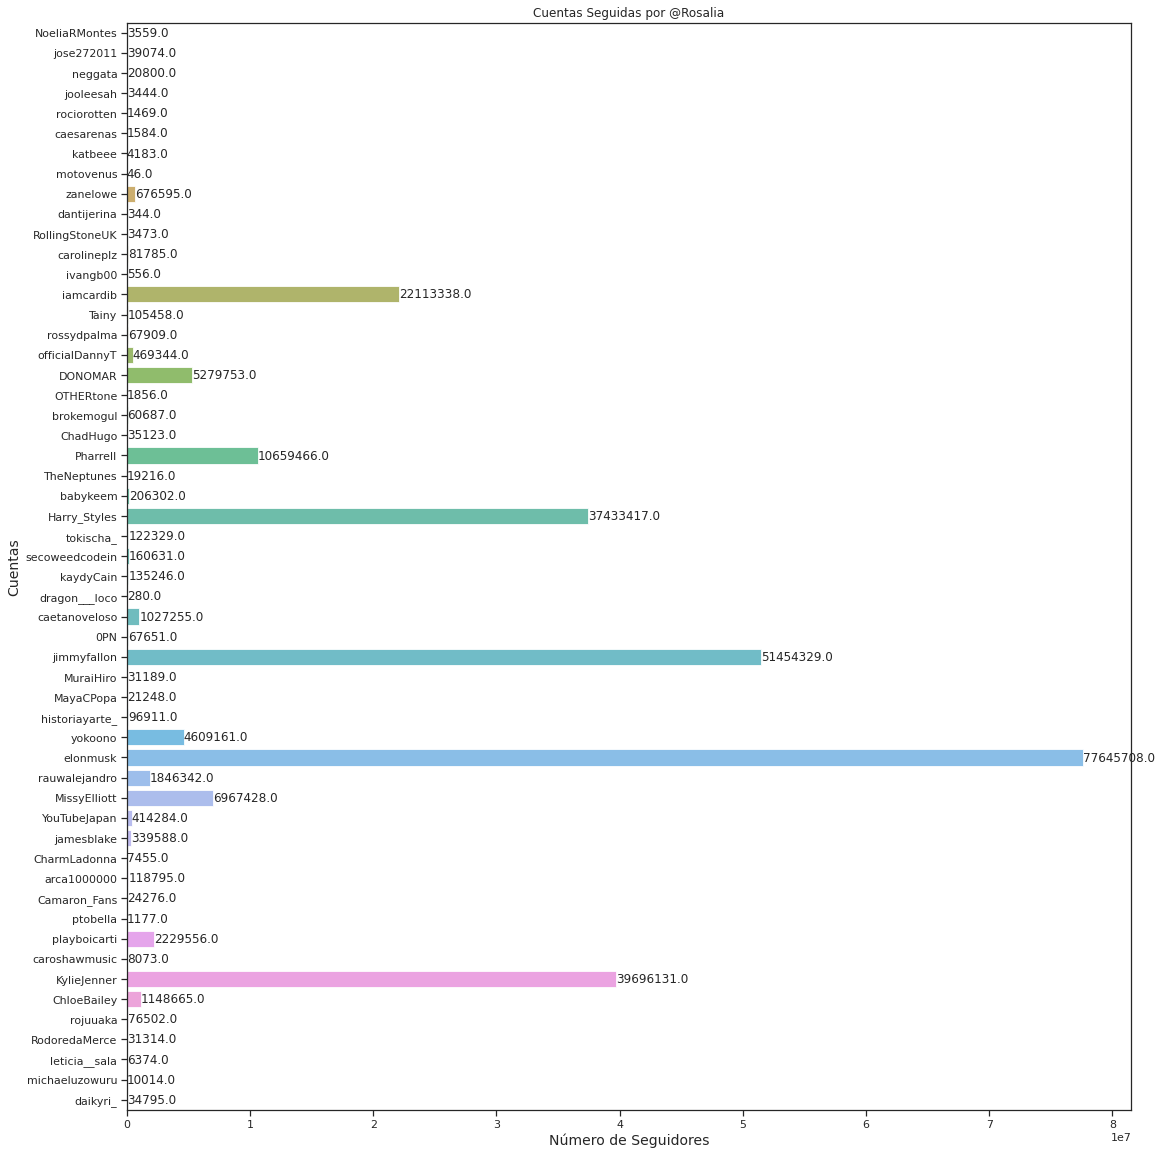

In [89]:
plt.figure(figsize=[18, 20])
sns.set(style="ticks")
bplot = sns.barplot(x = 'Followers Count' , y = 'Username' , data= df_rosalia, alpha=0.8)


for p in bplot.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+ 0.5*p.get_height(),
             '{:1.1f}'.format(width),
             ha='left', va='center')



plt.title('Cuentas Seguidas por @Rosalia');
plt.ylabel('Cuentas', fontsize=14);
plt.xlabel('Número de Seguidores', fontsize=14);

# Análisis de últimos 5 tweets de @Rosalia

In [92]:
tweets = client.get_users_tweets(id=user.data.id, 
                                 tweet_fields=["public_metrics","context_annotations","created_at","geo","lang"],
                                 max_results =5)

df_tweets = pd.DataFrame()

for tweet in tweets.data:
  df_tweets = df_tweets.append(pd.json_normalize({'created_at':tweet.created_at, 
                                                  'text':tweet.text})) 

df_tweets.reset_index(drop=True, inplace=True)
df_tweets


,created_at,text
0,2022-03-13 23:13:01+00:00,RT @JANN_vt: HA COMENZADO LA #MOTOMAMI WEEK @R...
1,2022-03-13 21:57:20+00:00,RT @RosaliaSources: .@Rosalia hace una lectura...
2,2022-03-13 21:14:40+00:00,🤪 @nbcsnl https://t.co/tOOILn2FlL
3,2022-03-13 21:12:33+00:00,❤️ @nbcsnl https://t.co/bJHk0XzsrX
4,2022-03-13 00:06:10+00:00,RT @RosaliaSources: En 4 horas y 30 minutos co...


# Análisis de los últimos 5 tweets Entidad: Chile

In [94]:
# declaramos la clase listener que va a instanciar tweepy.StreamingClient 
class listener(tweepy.StreamingClient):
    # creamos un contador de twits capturados
    def on_connect(self):
        self.counter = 0
        self.limit = 5
    # evento que se ejecuta con cada tweet
    def on_tweet(self, tweet):
        
        self.counter += 1
        print(self.counter, ".\n"
              "Author_id: ", tweet.author_id, 
              "\nFecha y Hora Publicación: ", tweet.created_at, 
              "\nTweet: ", tweet.text, "\n\n")
        if self.counter < self.limit:
            return True
        else:
            self.disconnect()
    def on_error(self, tweet):
        print(tweet)

# declaramos la instancia de tweepy.StreamingClient
listen = listener(bearer_token,wait_on_rate_limit=True)


# eliminamos las reglas previas
printer_rules = listen.get_rules()
if printer_rules.data is not None:
  listen.delete_rules([str(i.id) for i in listen.get_rules().data])

# declaramos la nueva regla
listen.add_rules(tweepy.StreamRule('entity:"Chile" -is:retweet'))
# filtramos e indicamos los campos a recuperar.
listen.filter(tweet_fields=["created_at","text","author_id"], user_fields=["username"])


1 .
Author_id:  1429602967435481089 
Fecha y Hora Publicación:  2022-03-14 01:43:05+00:00 
Tweet:  Chile like bad grass!! https://t.co/bqZ4iBw2mQ 


2 .
Author_id:  134315538 
Fecha y Hora Publicación:  2022-03-14 01:43:07+00:00 
Tweet:  @DMatamala @CHVNoticias Que decente habría sido de su parte que una décima parte de esa voluntad para reportear lo que pasa en #Ucrania la hubiera tenido en Chile,  para reportear las violaciones de DDHH que ocurrían en su país , a 10 min de tu canal  , para el 18/OCT. 🤦🏻‍♂️ 


3 .
Author_id:  1675029582 
Fecha y Hora Publicación:  2022-03-14 01:43:11+00:00 
Tweet:  @T13 Tantos flaites en Chile y no lo sabíamos!! 


4 .
Author_id:  1249814546941980683 
Fecha y Hora Publicación:  2022-03-14 01:43:17+00:00 
Tweet:  @ferchando55 @faberamirez @DonIzquierdo_ México viento en popa?? 🤭...muere más gente a balazos que en ucrania....y Chile dale 4 años y se empezarán a comer los gatos ... 




Stream connection closed by Twitter


5 .
Author_id:  118545314 
Fecha y Hora Publicación:  2022-03-14 01:43:27+00:00 
Tweet:  @Mister_Wolf_0 @ernestogarratt ...lo trajeron de vuelta ya que en Ucrania no fue ningún aporte, acá en chile tampoco lo es 


